Zero-cross for unfiltered lower trunk rotation data detected 54 lower trunk rotations.
Zero-cross for filtered lower trunk rotation data detected 14 lower trunk rotations


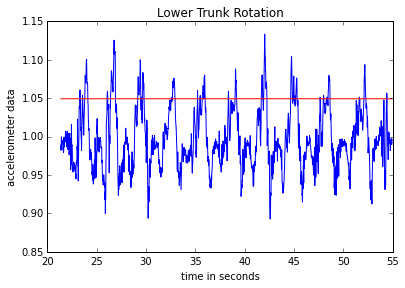

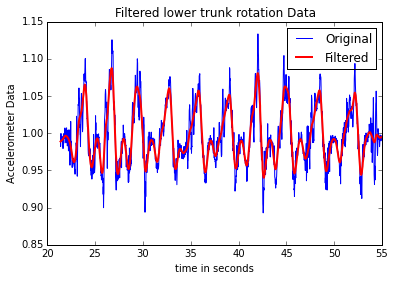

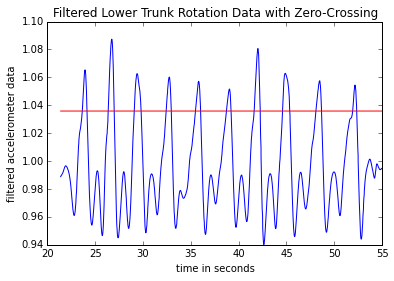

In [47]:
import urllib
import matplotlib.pyplot as plt
import csv
import sys
from math import *
from matplotlib import *
import numpy as np
from scipy import *
import scipy.signal as signal

%matplotlib  inline

#Code to import data and make analyzation easier:
#file_name = raw_input("File name (_____.csv): ")
file_name = "lower_trunk_rotation.csv"
#header = raw_input("Title to place above graphs: ")
header = "Lower Trunk Rotation"
action = ""
if header == "walking" or header == "Walking":
    action = "step"
else:
    action = header.lower()

#File name to read:
csv_reader = csv.reader(open(file_name))

#Max & Min values for size of graph
bigx = float(-sys.maxint -1)
bigy = float(-sys.maxint -1)
smallx = float(sys.maxint)
smally = float(sys.maxint)

verts = []

for row in csv_reader:
    verts.append(row)
    if float (row[0]) > bigx:
        bigx = float(row[0])
        if float(row[1]) > bigy:
            bigy = float(row[1])
            if float(row[0]) < smallx:
                smallx = float(row[0])
                if float(row[1]) < smally:
                    smally = float(row[1])
                    if float(row[2]) > bigy:
                        bigy = float(row[2])

verts.sort()
x_arr = []
y_arr = []

for vert in verts:
    x_arr.append(float(vert[0])) #(time)
    y_arr.append(float(sqrt(float(vert[1])**2 + float(vert[2])**2 + float(vert[3])**2))) #(magnitude of xyz axis)

fig = plt.figure()

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.set_title(header)
ax.set_xlabel("time in seconds")
ax.set_ylabel("accelerometer data")

pyplot.plot(x_arr, y_arr)
plt.plot(x_arr, zero_cross_visual(x_arr, y_arr), color="red")
fig.savefig("" + action + ".pdf")

def zero_cross(x_arr, y_arr):
    #Find zero-cross line
    ymax = max(y_arr)
    ymin = min(y_arr)
    alpha = 0.65
    zero_cross = alpha * (ymax-ymin) + ymin
    
    #Zero-Crossing Detection Algorithm
    step_counter = 0
    i = 0
    while i < len(y_arr):
        if float(y_arr[i]) > (zero_cross-0.075) and float(y_arr[i]) < (zero_cross+0.075):
            step_counter += 1
            i += 30 #add delay if step is detected
        else:
            i += 1
    return step_counter

def zero_cross_visual(x_arr, y_arrf):
    ymax = max(y_arrf)
    ymin = min(y_arrf)
    alpha = 0.65
    zero_cross = alpha * (ymax-ymin) + ymin
    horizontal_line_arr = []
    i = 0
    while i < len(y_arr):
        horizontal_line_arr.append(float(zero_cross))
        i += 1
    return horizontal_line_arr

#Butterworth Filter
N = 2 #Filter order
Wn = 0.05 #Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')

y_arrf = signal.filtfilt(B,A, y_arr)

#Make plots
fig = plt.figure()
plt.plot(x_arr, y_arr, 'b-')
plt.plot(x_arr, y_arrf, 'r-', linewidth=2)
plt.xlabel("time in seconds")
plt.ylabel("Accelerometer Data")
plt.legend(['Original', 'Filtered'])
plt.title("Filtered " + action + " Data")
fig.savefig("" + action + "filter.pdf")

fig = plt.figure()
plt.title("Filtered " + header + " Data with Zero-Crossing")
plt.xlabel("time in seconds")
plt.ylabel("filtered accelerometer data")
plt.plot(x_arr, y_arrf)
plt.plot(x_arr, zero_cross_visual(x_arr, y_arrf), color="red")
fig.savefig("zero_cross_" + header + ".pdf")

print ("Zero-cross for unfiltered " + header.lower() + " data detected %s " + action + "s.") % (zero_cross(x_arr, y_arr))
print ("Zero-cross for filtered " + header.lower() + " data detected %s " + action + "s") % (zero_cross(x_arr, y_arrf)/4)